# Machine Learning Model For Petugas Liar Clasificaiton

- Our App able to flasification a illegal officer for parking area, in this model, prameter that we use is :
 - The specific location of officer's been 
 - The officer's id card (if available)

## Library 

In [ ]:
import pandas as pd
import joblib as joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt

## Data Preparation

In [2]:
BASEDATA = "Dataset/data_augmentasi_petugas.csv"
FILENAME = "Petugas_Model.pkl"

In [3]:
# Load Dataset
Petugas_df = pd.read_csv(BASEDATA)

In [24]:
Petugas_df.head(5)

,Lokasi,Status Pelaporan,Identitas Petugas
0,Pusat Perbelanjaan,Tidak Liar,Ada
1,Universitas,Liar,Tidak Ada
2,Tempat Umum,Tidak Liar,Ada
3,Gedung Perkantoran,Liar,Tidak Ada
4,Rumah Sakit,Liar,Tidak Ada


In [25]:
Petugas_df.value_counts

<bound method DataFrame.value_counts of                    Lokasi Status Pelaporan Identitas Petugas
0      Pusat Perbelanjaan       Tidak Liar               Ada
1             Universitas             Liar         Tidak Ada
2             Tempat Umum       Tidak Liar               Ada
3      Gedung Perkantoran             Liar         Tidak Ada
4             Rumah Sakit             Liar         Tidak Ada
...                   ...              ...               ...
29995         Tempat Umum       Tidak Liar               Ada
29996         Universitas       Tidak Liar               Ada
29997         Rumah Sakit             Liar         Tidak Ada
29998         Rumah Sakit             Liar         Tidak Ada
29999         Universitas       Tidak Liar               Ada

[30000 rows x 3 columns]>

In [5]:
print("Data yang NAN : ")
Petugas_df.isna().sum()

Data yang NAN : 


Lokasi               0
Status Pelaporan     0
Identitas Petugas    0
dtype: int64

## Handling missing value

In [6]:
Petugas_df.dropna(inplace = True)

In [7]:
Petugas_df.head()

,Lokasi,Status Pelaporan,Identitas Petugas
0,Pusat Perbelanjaan,Tidak Liar,Ada
1,Universitas,Liar,Tidak Ada
2,Tempat Umum,Tidak Liar,Ada
3,Gedung Perkantoran,Liar,Tidak Ada
4,Rumah Sakit,Liar,Tidak Ada


In [8]:
# Petugas_df["Lokasi"].fillna(Petugas_df["Lokasi"].mean(),inplace=True)
# Petugas_df["Status Pelaporan"].fillna(Petugas_df["Status Pelaporan"].mean(),inplace=True)
# Petugas_df["Identitas Petugas"].fillna(Petugas_df["Identitas Petugas"].mean(),inplace=True)

In [9]:
# Pisahkan fitur dan target
X = Petugas_df.drop('Status Pelaporan', axis=1)  # Fitur
y = Petugas_df['Status Pelaporan']               # Target


In [10]:

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
print((X_train.shape, X_test.shape), (y_train.shape, y_test.shape))

((24000, 2), (6000, 2)) ((24000,), (6000,))


## Preproceisng

In [ ]:
    
# Preprocessing
categorical_cols = [ 'Lokasi', 
                    'Identitas Petugas' ]  # Kolom kategori

In [12]:
# Preprocessing pipeline (OneHot untuk kategori, tetap untuk numerik)
preprocessor = ColumnTransformer(
    transformers=[
        ('Encode', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

## Building model 

In [13]:
# 6. Inisialisasi dan latih model KNN
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors=5))])

In [14]:
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Lokasi',
                                                   'Identitas Petugas'])])),
                ('classifier', KNeighborsClassifier())])

## PREDICTION

In [15]:
def save_model(model,filename):
    joblib.dump(model, filename)
    print(f"Model saved to : {filename}")

In [16]:
print(X_test)

                   Lokasi Identitas Petugas
2308   Pusat Perbelanjaan         Tidak Ada
22404         Rumah Sakit               Ada
23397         Rumah Sakit         Tidak Ada
25058         Tempat Umum               Ada
2664   Pusat Perbelanjaan         Tidak Ada
...                   ...               ...
2210   Gedung Perkantoran               Ada
14144         Tempat Umum         Tidak Ada
23108         Universitas               Ada
25703  Gedung Perkantoran               Ada
29171         Universitas               Ada

[6000 rows x 2 columns]


In [17]:
## save_model(knn, FILENAME)
#  Data baru untuk prediksi
new_data = pd.DataFrame({
    'Lokasi': ['Pusat Perbelanjaan', 'Gedung Perkantoran'],  # Lokasi valid dari dataset
    'Identitas Petugas': ['Ada', 'Tidak Ada']
})

# Prediksi
y_pred = knn.predict(new_data)

# Hasil prediksi
new_data['Prediksi Status Pelaporan'] = y_pred

In [18]:
# Print hasil prediksi
print(new_data[[ 'Lokasi', 'Identitas Petugas', 'Prediksi Status Pelaporan']])

               Lokasi Identitas Petugas Prediksi Status Pelaporan
0  Pusat Perbelanjaan               Ada                Tidak Liar
1  Gedung Perkantoran         Tidak Ada                      Liar


In [19]:
y_pred = knn.predict(X_test)

In [20]:
print(f"X_test shape: {X_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

X_test shape: (6000, 2)
y_pred shape: (6000,)


## VISUALIZATION

In [ ]:
class visualization:
    def Confusion_matrix(y_test, y_pred, knn):
        # Compute and display confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=knn.classes_)
        disp.plot()
        plt.title("Confusion Matrix Petugas")
        plt.show()
        
    def Classification_report(y_test, y_pred):
        report = classification_report(y_test, y_pred, target_names=['Tidak Liar Pelanggaran', 'Liar'])
        print("\nClassification Report Petugas:\n", report)

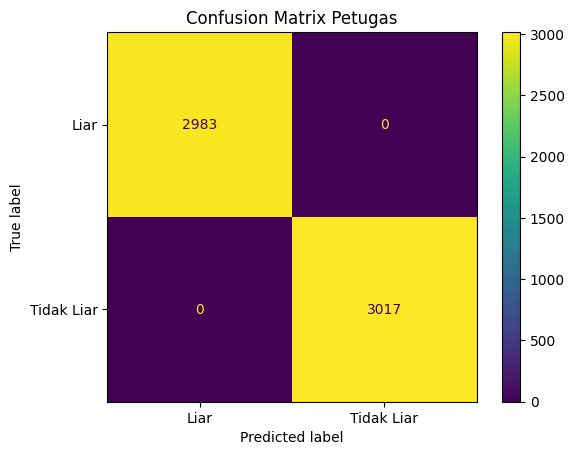

In [22]:
visualization.Confusion_matrix(y_test, y_pred, knn)

In [23]:
visualization.Classification_report(y_test, y_pred)


Classification Report Petugas:
                         precision    recall  f1-score   support

Tidak Liar Pelanggaran       1.00      1.00      1.00      2983
                  Liar       1.00      1.00      1.00      3017

              accuracy                           1.00      6000
             macro avg       1.00      1.00      1.00      6000
          weighted avg       1.00      1.00      1.00      6000

